**Binary Classification**

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

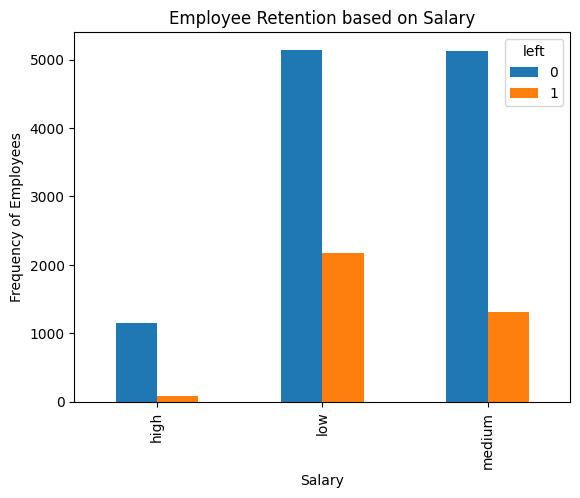

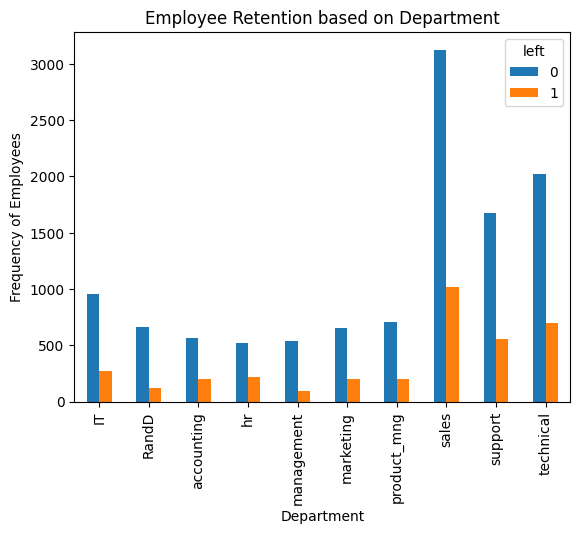

Accuracy of the Logistic Regression Model: 0.7784


In [6]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/HR_comma_sep.csv')


# 1. Exploratory Data Analysis
print(df.head())
print(df.info())
print(df.describe())

# Analyze relationships between variables and retention
print(df.groupby('left')['satisfaction_level'].mean())
print(df.groupby('left')['average_montly_hours'].mean())
print(df.groupby('left')['promotion_last_5years'].mean())
print(df.groupby('left')['salary'].value_counts())


# 2. Impact of salary on retention
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title('Employee Retention based on Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency of Employees')
plt.show()

# 3. Correlation between department and employee retention
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.title('Employee Retention based on Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Employees')
plt.show()

# 4. Logistic Regression Model
# Select relevant features (based on EDA)
X = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
X = pd.get_dummies(X, columns=['salary'], drop_first=True)  # Convert categorical 'salary' to numerical
y = df['left']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 5. Model Accuracy
# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression Model:", accuracy)


**Multiclass Classification**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 1.00


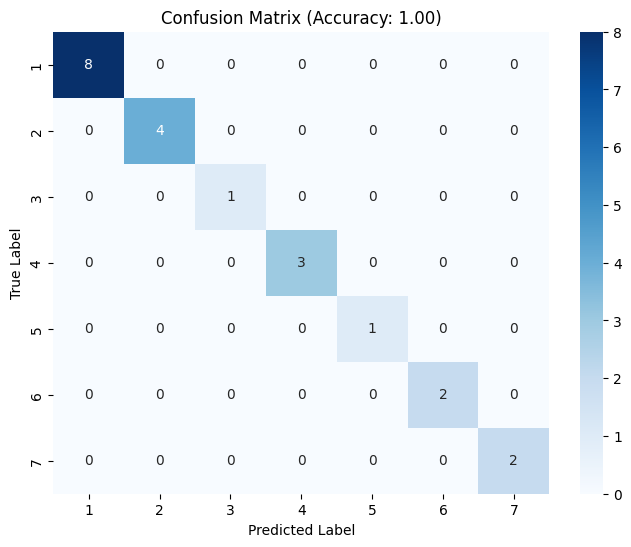

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load datasets
zoo_data_path = "/content/zoo-data.csv"
zoo_class_type_path = "/content/zoo-class-type.csv"

zoo_data = pd.read_csv(zoo_data_path)
zoo_class_type = pd.read_csv(zoo_class_type_path)

# Drop 'animal_name' as it's not a predictive feature
zoo_data = zoo_data.drop(columns=["animal_name"])

# Split features (X) and target (y)
X = zoo_data.drop(columns=["class_type"])
y = zoo_data["class_type"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs")
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()